In [1]:
import feature_eng.utils as utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [12]:
X_train, y_train, X_test, y_test = utils.get_train_test_sets()

Loading data ...


/home/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Cleaning data and feature engineering...
Spliting data into training and testing...
Done


In [6]:
len(X_train)

81733

In [17]:
X_train= X_train.drop('transactiondate',1)

In [18]:
X_test= X_test.drop('transactiondate',1)

In [19]:
X_train.loc[3160:3170]

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,propertyzoningdesc_20,propertyzoningdesc_21,propertyzoningdesc_22,propertyzoningdesc_23,propertyzoningdesc_24,propertyzoningdesc_25,propertyzoningdesc_26,propertyzoningdesc_27,propertyzoningdesc_28,propertyzoningdesc_29
3160,3.0,6.0,0.0,3.0,0.0,2744.0,2744.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3162,3.5,4.0,0.0,3.5,2827.0,5222.0,5222.0,0.0,0.0,2827.0,...,0,0,0,0,0,0,0,0,1,0
3163,1.0,1.0,7.0,1.0,0.0,588.0,588.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3164,1.0,2.0,7.0,1.0,0.0,810.0,810.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3165,1.0,2.0,4.0,1.0,0.0,1015.0,1015.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3166,2.0,4.0,7.0,2.0,0.0,1397.0,1397.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3167,2.0,3.0,7.0,2.0,0.0,1634.0,1634.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3168,3.0,5.0,4.0,3.0,0.0,2464.0,2464.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3169,2.0,4.0,4.0,2.0,0.0,2257.0,2257.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3170,2.0,2.0,4.0,2.0,0.0,1216.0,1216.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_test.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,propertyzoningdesc_20,propertyzoningdesc_21,propertyzoningdesc_22,propertyzoningdesc_23,propertyzoningdesc_24,propertyzoningdesc_25,propertyzoningdesc_26,propertyzoningdesc_27,propertyzoningdesc_28,propertyzoningdesc_29
3161,3.0,6.0,0.0,3.0,0.0,2744.0,2744.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3421,2.5,2.0,0.0,2.5,0.0,2031.0,2031.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4191,2.0,2.0,7.0,2.0,0.0,1257.0,1257.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10829,4.0,6.0,4.0,4.0,0.0,4021.0,4021.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
10941,3.0,3.0,1.0,3.0,0.0,2146.0,2146.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Change DataFrame to matrix 

In [21]:
y_train_trans=np.arctan(32.0301149*(-0.005208795+y_train))/3.141593

(array([  2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   4.00000000e+01,   2.00000000e+00,
          1.00000000e+01,   2.50000000e+01,   6.30000000e+01,
          1.98000000e+02,   1.15400000e+03,   6.81030000e+04,
          1.09610000e+04,   7.33000000e+02,   2.27000000e+02,
          8.70000000e+01,   3.70000000e+01,   2.20000000e+01,
          2.20000000e+01,   2.20000000e+01,   6.00000000e+00,
          8.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   3.00000000e+00]),
 array([-4.605 , -4.2936, -3.9822, -3.6708, -3.3594, -3.048 , -2.7366,
        -2.4252, -2.1138, -1.8024, -1.491 , -1.1796, -0.8682, -0.5568,
        -0.2454,  0.066 ,  0.3774,  0.6888,  1.0002,  1.3116,  1.623 ,
         1.9344,  2.2458,  2.5572,  2.8686,  3.18  ,  3.4914,  3.8028,
         4.1142,  4.4256,  4.737 ]),
 <a list of 30 Patch objects>)

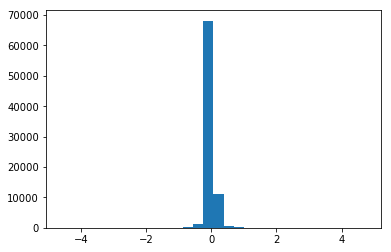

In [32]:
plt.hist(y_train,30)

(array([ 1220.,  2493.,  2936.,  3187.,  3024.,  3393.,  3102.,  2766.,
         2667.,  3009.,  2725.,  2884.,  2224.,  2296.,  3306.,  2296.,
         2240.,  2856.,  2667.,  2442.,  2714.,  2493.,  2945.,  3189.,
         2872.,  3078.,  3080.,  2964.,  2815.,  1850.]),
 array([ -4.97844364e-01,  -4.64652893e-01,  -4.31461423e-01,
         -3.98269953e-01,  -3.65078482e-01,  -3.31887012e-01,
         -2.98695541e-01,  -2.65504071e-01,  -2.32312600e-01,
         -1.99121130e-01,  -1.65929659e-01,  -1.32738189e-01,
         -9.95467185e-02,  -6.63552481e-02,  -3.31637777e-02,
          2.76927929e-05,   3.32191632e-02,   6.64106337e-02,
          9.96021041e-02,   1.32793575e-01,   1.65985045e-01,
          1.99176515e-01,   2.32367986e-01,   2.65559456e-01,
          2.98750927e-01,   3.31942397e-01,   3.65133868e-01,
          3.98325338e-01,   4.31516809e-01,   4.64708279e-01,
          4.97899749e-01]),
 <a list of 30 Patch objects>)

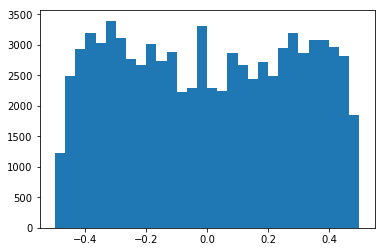

In [31]:
plt.hist(y_train_trans,30)

In [22]:
X_train_m, X_test_m, y_train_m, y_test_m = list(map(lambda x: x.as_matrix(), (X_train, X_test, y_train_trans, y_test)))

Random Forests example

In [23]:
rfclassifier = RandomForestRegressor(n_estimators=10)
rfclassifier.fit(X_train_m, y_train_m)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [24]:
y_test_predict = rfclassifier.predict(X_test_m)

(array([   4.,    7.,   20.,   37.,   55.,   80.,  150.,  234.,  334.,
         479.,  565.,  741.,  786.,  872.,  823.,  800.,  689.,  571.,
         459.,  287.,  209.,  153.,   83.,   45.,   29.,   15.,    6.,
           6.,    1.,    2.]),
 array([-0.40339168, -0.3739336 , -0.34447553, -0.31501745, -0.28555938,
        -0.2561013 , -0.22664323, -0.19718515, -0.16772708, -0.13826901,
        -0.10881093, -0.07935286, -0.04989478, -0.02043671,  0.00902137,
         0.03847944,  0.06793751,  0.09739559,  0.12685366,  0.15631174,
         0.18576981,  0.21522789,  0.24468596,  0.27414404,  0.30360211,
         0.33306018,  0.36251826,  0.39197633,  0.42143441,  0.45089248,
         0.48035056]),
 <a list of 30 Patch objects>)

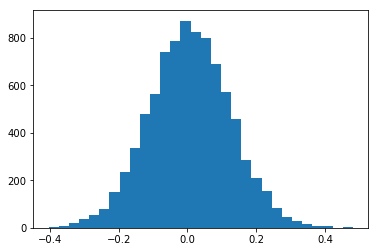

In [28]:
plt.hist(y_test_predict,30)

In [29]:
y_test_predict_trans=0.0052088+0.0312206*np.tan(3.141593*y_test_predict)

(array([  6.70000000e+01,   7.95800000e+03,   5.08000000e+02,
          6.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([-0.09448033, -0.03399993,  0.02648046,  0.08696086,  0.14744126,
         0.20792165,  0.26840205,  0.32888245,  0.38936285,  0.44984324,
         0.51032364]),
 <a list of 10 Patch objects>)

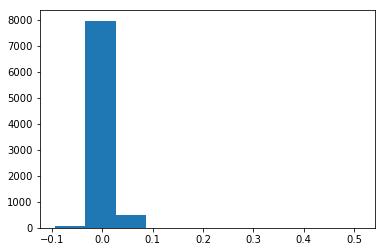

In [30]:
plt.hist(y_test_predict_trans)

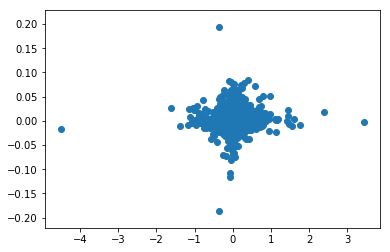

In [26]:
plt.scatter(y_test_m, y_test_predict_trans)

In [27]:
np.mean(abs(y_test_m - y_test_predict_trans))

0.066407369661890758

# Wrap up

In [5]:
import evaluator

In [ ]:
X_train, y_train, X_test, y_test = utils.get_train_test_sets()

In [9]:
ev = evaluator.Evaluator()
ev.load_train_test((X_train, y_train, X_test, y_test))

In [10]:
ev.fit(RandomForestRegressor(n_estimators=10))

Fitting from training data
Predicting
Training set 0.0960392041679
Testing set 0.247058417671


Fitting from training data
Predicting
Training set 0.0335747407458
Testing set 0.0814453411737